In [252]:
import torch
import h5py
import os
import numpy as np
from torch import nn as nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

# using the API of d2l
from d2l import torch as d2l

In [2]:
data_dir = './dataset'  # snapshot_000_100_particle.hdf5

In [3]:
testFiles = os.listdir(data_dir)

In [4]:
len(testFiles)

37

In [31]:
testFiles

['0_particle.hdf5',
 '10_particle.hdf5',
 '11_particle.hdf5',
 '12_particle.hdf5',
 '13_particle.hdf5',
 '14_particle.hdf5',
 '15_particle.hdf5',
 '16_particle.hdf5',
 '17_particle.hdf5',
 '18_particle.hdf5',
 '19_particle.hdf5',
 '1_particle.hdf5',
 '20_particle.hdf5',
 '21_particle.hdf5',
 '22_particle.hdf5',
 '23_particle.hdf5',
 '24_particle.hdf5',
 '25_particle.hdf5',
 '26_particle.hdf5',
 '27_particle.hdf5',
 '28_particle.hdf5',
 '29_particle.hdf5',
 '2_particle.hdf5',
 '30_particle.hdf5',
 '31_particle.hdf5',
 '32_particle.hdf5',
 '33_particle.hdf5',
 '34_particle.hdf5',
 '35_particle.hdf5',
 '36_particle.hdf5',
 '3_particle.hdf5',
 '4_particle.hdf5',
 '5_particle.hdf5',
 '6_particle.hdf5',
 '7_particle.hdf5',
 '8_particle.hdf5',
 '9_particle.hdf5']

In [6]:
testFilePath = os.path.join(data_dir, '10_particle.hdf5')

In [7]:
testFilePath

'./dataset/10_particle.hdf5'

In [8]:
testFile = h5py.File(testFilePath)

In [9]:
for key in testFile:
    print(key)

10


In [10]:
testFile['10'][:].shape

(126, 12)

In [11]:
f = h5py.File('./snapshot_000.hdf5')

In [12]:
for p in f['dataset']:
    if p[0] == 10.:
        particle10 = p

In [13]:
particle10

array([ 1.0000000e+01,  2.9456370e+21,  8.0024481e+00,  1.4107614e+07,
       -1.9564783e+11,  2.4640620e+07, -1.6455928e+08, -4.3253580e+07,
        1.2894613e+07,  2.9160733e+02,  4.4095953e+04,  1.3067218e+02],
      dtype=float32)

In [14]:
class Dateset_sph(Dataset):
    def __init__(self, features, labels):
        super(Dateset_sph, self).__init__()
        self.features = features
        self.labels = labels
        
    def __getitem__(self, index):
        return self.features[index], self.labels[index]
    
    def __len__(self):
        return len(self.features)

In [15]:
# particle100--label.  
# NeighborParticles--features

In [16]:
# 提取相应物理量的坐标
particle_10_neighbor_particles = []
for p in testFile['10']:
    particle_10_neighbor_particles.append([p[0], p[1], p[2], p[5], p[6], p[9]])

In [17]:
particle_10_neighbor_particles, len(particle_10_neighbor_particles)

([[12.0, 2.945637e+21, 7.96096, 24682298.0, -165883170.0, 298.50082],
  [17.0, 2.945637e+21, 8.034667, 24610816.0, -167189810.0, 296.7773],
  [18.0, 2.945637e+21, 8.022338, 24619978.0, -166891100.0, 295.1944],
  [19.0, 2.945637e+21, 8.035706, 24607916.0, -167802620.0, 300.31058],
  [20.0, 2.945637e+21, 8.011768, 24632234.0, -165740340.0, 298.3827],
  [21.0, 2.945637e+21, 8.009963, 24634002.0, -165744030.0, 298.32278],
  [22.0, 2.945637e+21, 7.962839, 24679852.0, -165703490.0, 300.08984],
  [23.0, 2.945637e+21, 7.953202, 24689432.0, -165732600.0, 299.3514],
  [29.0, 2.945637e+21, 8.015273, 24631120.0, -169253490.0, 303.59393],
  [30.0, 2.945637e+21, 7.9932775, 24652538.0, -169328590.0, 302.7085],
  [31.0, 2.945637e+21, 8.000595, 24641952.0, -169902880.0, 292.14755],
  [32.0, 2.945637e+21, 8.013153, 24631008.0, -168110930.0, 290.4665],
  [33.0, 2.945637e+21, 7.999516, 24644254.0, -165766660.0, 297.84863],
  [34.0, 2.945637e+21, 8.003986, 24639196.0, -165579740.0, 302.23312],
  [35.0, 2.9

In [18]:
particle_10_neighbor_particles = torch.tensor(particle_10_neighbor_particles)

In [19]:
particle_10_neighbor_particles.shape

torch.Size([126, 6])

In [20]:
particle_10 = torch.tensor([particle10[0], particle10[1], particle10[2], 
                 particle10[5], particle10[6], particle10[9]])

In [21]:
particle_10.shape

torch.Size([6])

In [339]:
# 写一个批处理的程序
center_particle = []
particle_neighbor_particles = {}
for file in testFiles:
    filename = os.path.splitext(file)
    # print(filename[0][:-9])
    if filename[1] == '.hdf5':
        path = os.path.join(data_dir, 'train',file)
        # print(path)
        center_particleID = filename[0][:-9]
        f_center_particle = h5py.File('./snapshot_000.hdf5')
        f_neighbor_particles = h5py.File(path)
        
        for p in f_center_particle['dataset']:
            if p[0] == float(center_particleID):
                # print(p)
                # center_particle.append([p[0], p[1], p[2], p[5], p[6], p[9]])
                center_particle.append([p[9]])
                
        particle_neighbor_particles[center_particleID] = []
        k = 0
        for p in f_neighbor_particles[center_particleID]:
            # particle_neighbor_particles[center_particleID].append([p[0], p[1], p[2], p[5], p[6], p[9]])
            particle_neighbor_particles[center_particleID].append([p[1], p[2], p[5], p[6], p[9]])
            k += 1
            if k == 100:
                break
                
        # f_neighbor_particles = h5py.File()

In [340]:
#center_particle, 
len(center_particle)

36

In [341]:
#particle_neighbor_particles, 
len(particle_neighbor_particles)

37

In [342]:
del particle_neighbor_particles['0']

In [343]:
len(particle_neighbor_particles)

36

In [344]:
center_particle

[[291.60733],
 [281.8423],
 [298.50082],
 [275.4272],
 [280.0838],
 [287.25867],
 [293.94577],
 [296.7773],
 [295.1944],
 [300.31058],
 [274.2551],
 [298.3827],
 [298.32278],
 [300.08984],
 [299.3514],
 [275.17093],
 [280.0838],
 [280.64285],
 [291.5812],
 [301.32608],
 [303.59393],
 [283.81116],
 [302.7085],
 [292.14755],
 [290.4665],
 [297.84863],
 [302.23312],
 [300.32935],
 [311.35617],
 [278.6509],
 [293.17624],
 [286.7216],
 [288.62802],
 [276.36734],
 [277.8106],
 [282.07037]]

In [230]:
#particle_neighbor_particles
# ParticleIDs√ Masses√ Density√ Coordinates√ Velocities√

In [345]:
particle_neighbor_particles.keys()

dict_keys(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '3', '4', '5', '6', '7', '8', '9'])

In [346]:
neighbor_particles = []
for key in particle_neighbor_particles.keys():
    neighbor_particles.append([particle_neighbor_particles[key]])

In [347]:
neighbor_particles_ = []
for i in range(len(neighbor_particles)):
    neighbor_particles_.append(neighbor_particles[i][0][:])

In [348]:
# 单独处理！！！

In [349]:
len(neighbor_particles_[3])

100

In [386]:
# 归一化
# norm function for numpy
def data_norm(data):
    mean = data.mean(axis=0, keepdims=True)
    std = data.std(axis=0, keepdims=True)
    return (data-mean)/std

In [387]:
a = torch.Tensor(36, 100, 5)

torch.Size([36, 100, 5])

In [350]:
neighbor_particles_t = torch.tensor(neighbor_particles_)

In [351]:
center_particle_t = torch.tensor(center_particle)

In [352]:
neighbor_particles_t.shape, center_particle_t.shape

(torch.Size([36, 100, 5]), torch.Size([36, 1]))

In [390]:
center_particle_t = data_norm(center_particle_t)

In [391]:
neighbor_particles_t = data_norm(neighbor_particles_t)

In [357]:
# 先尝试基本的神经网络
#neighbor_nums = 100
class FNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, neighbor_nums):
        super(FNN, self).__init__()
        
        layers = []
        layers.append(nn.Linear(input_dim*neighbor_nums, hidden_dim))
        layers.append(nn.ReLU(inplace=True))
        
        curr_dim = hidden_dim
        for i in range(2):
            layers.append(nn.Linear(curr_dim, curr_dim*2))
            layers.append(nn.ReLU(inplace=True))
            curr_dim = curr_dim*2
            
        layers.append(nn.Linear(curr_dim, curr_dim//2))
        layers.append(nn.Tanh())
        layers.append(nn.Linear(curr_dim//2, output_dim))
        
        self.main = nn.Sequential(*layers)
    
    def forward(self, x):
        batch_nums = x.shape[0]
        x = x.reshape(batch_nums, -1)
        return self.main(x)
    

In [358]:
t = FNN(5, 1, 10, 100)

In [359]:
t

FNN(
  (main): Sequential(
    (0): Linear(in_features=500, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=20, out_features=40, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=40, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [360]:
a = torch.Tensor(36, 100, 5)

In [362]:
a.shape, t(a).shape

(torch.Size([36, 100, 5]), torch.Size([36, 1]))

In [336]:
a.reshape(36,-1).shape

torch.Size([36, 600])

In [ ]:
len(train_data)

In [381]:
batch_size = 2

In [282]:
# vaild data
testFiles_vaild = os.listdir('./dataset/vaild')
center_particle_vaild = []
particle_neighbor_particles_vaild = {}
for file in testFiles_vaild:
    filename = os.path.splitext(file)
    # print(filename[0][:-9])
    if filename[1] == '.hdf5':
        path = os.path.join('./dataset/vaild', file)
        # print(path)
        center_particleID = filename[0]
        f_center_particle = h5py.File('./snapshot_001.hdf5')
        f_neighbor_particles = h5py.File(path)
        
        for p in f_center_particle['dataset']:
            if p[0] == float(center_particleID):
                # print(p)
                # center_particle.append([p[0], p[1], p[2], p[5], p[6], p[9]])
                center_particle_vaild.append([p[9]])
                
        particle_neighbor_particles_vaild[center_particleID] = []
        k = 0
        for p in f_neighbor_particles[center_particleID]:
            # particle_neighbor_particles[center_particleID].append([p[0], p[1], p[2], p[5], p[6], p[9]])
            particle_neighbor_particles_vaild[center_particleID].append([p[1], p[2], p[5], p[6], p[9]])
            k += 1
            if k == 100:
                break
                

In [283]:
len(center_particle_vaild)

82

In [284]:
len(particle_neighbor_particles_vaild)

83

In [287]:
del particle_neighbor_particles_vaild['0']

KeyError: '0'

In [288]:
len(particle_neighbor_particles_vaild)

82

In [289]:
neighbor_particles_vaild = []
for key in particle_neighbor_particles_vaild.keys():
    neighbor_particles_vaild.append([particle_neighbor_particles_vaild[key]])
    
neighbor_particles_vaild_ = []
for i in range(len(neighbor_particles_vaild)):
    neighbor_particles_vaild_.append(neighbor_particles_vaild[i][0][:])

In [290]:
len(neighbor_particles_vaild)

82

In [291]:
len(neighbor_particles_vaild_)

82

In [392]:
center_particle_vaild_t = data_norm(torch.tensor(center_particle_vaild))

In [393]:
neighbor_particles_vaild_t = data_norm(torch.tensor(neighbor_particles_vaild_))

In [394]:
# dataset
train_data = Dateset_sph(neighbor_particles_t, center_particle_t)
valid_data = Dateset_sph(neighbor_particles_vaild_t, center_particle_vaild_t)

In [395]:
train_iter = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
valid_iter = DataLoader(vaild_data, batch_size=batch_size, shuffle=False, drop_last=False)

In [396]:
len(train_iter), len(valid_iter)

(18, 41)

In [366]:
def get_net():
    net = FNN(5, 1, 10,100)
    return net

In [367]:
loss = nn.MSELoss(reduction='none')

def evaluate_loss(data_iter, net, devices):
    l_sum, n = 0.0, 0
    for features, labels in data_iter:
        features, labels = features.to(devices[0]), labels.to(devices[0])
        outputs = net(features)
        l = loss(outputs, labels)
        l_sum += l.sum()
        n += labels.numel()
    return (l_sum / n).to('cpu')

In [368]:
def train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
          lr_decay):
    trainer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9,
                              weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_period, lr_decay)
    num_batches, timer = len(train_iter), d2l.Timer()
    legend = ['train loss', 'train acc']
    if valid_iter is not None:
        legend.append('valid acc')
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=legend)
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        net.train()
        metric = d2l.Accumulator(3)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
#             l, acc = d2l.train_batch_ch13(net, features, labels,
#                                           loss, trainer, devices)
            l, acc = train_batch(net, features, labels,
                                loss, trainer, devices)
            metric.add(l, acc, labels.shape[0])
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[2], metric[1] / metric[2],
                              None))
        if valid_iter is not None:
            valid_acc = d2l.evaluate_accuracy_gpu(net, valid_iter)
            animator.add(epoch + 1, (None, None, valid_acc))
        scheduler.step()
    measures = (f'train loss {metric[0] / metric[2]:.3f}, '
                f'train acc {metric[1] / metric[2]:.3f}')
    if valid_iter is not None:
        measures += f', valid acc {valid_acc:.3f}'
    print(measures + f'\n{metric[2] * num_epochs / timer.sum():.1f}'
          f' examples/sec on {str(devices)}')

In [369]:
def train_batch(net, X, y, loss, trainer, devices):
    if isinstance(X, list):
        # Required for BERT fine-tuning (to be covered later)
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])
    y = y.to(devices[0])
    net.train()
    trainer.zero_grad()
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()
    train_loss_sum = l.sum()
    train_acc_sum = accuracy(pred, y, 0.05)
    return train_loss_sum, train_acc_sum

In [373]:
def accuracy(y_hat, y, target):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = d2l.argmax(y_hat, axis=1)
    cmp = (torch.abs(d2l.astype(y_hat, y.dtype) - y) <= target)
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))

train loss nan, train acc 0.000, valid acc 0.000
624.3 examples/sec on [device(type='cuda', index=0)]


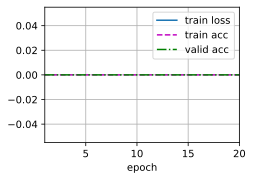

In [397]:
devices, num_epochs, lr, wd = d2l.try_all_gpus(), 20, 2e-4, 5e-4
lr_period, lr_decay, net = 4, 0.9, get_net()
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
      lr_decay)